In [1]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
pip install autots

Note: you may need to restart the kernel to use updated packages.


In [3]:
from autots import AutoTS

In [6]:
df = pd.read_csv('Data/AirQuality.csv',sep = ';',decimal=',')
df

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Unnamed: 15,Unnamed: 16
0,10/03/2004,18.00.00,2.6,1360.0,150.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578,NaN,NaN
1,10/03/2004,19.00.00,2.0,1292.0,112.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255,NaN,NaN
2,10/03/2004,20.00.00,2.2,1402.0,88.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502,NaN,NaN
3,10/03/2004,21.00.00,2.2,1376.0,80.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867,NaN,NaN
4,10/03/2004,22.00.00,1.6,1272.0,51.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9466,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9467,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9468,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9469,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
df = df.drop(['Unnamed: 15','Unnamed: 16'],axis = 1)
df.dropna(inplace = True)
df = df.replace(-200,np.nan)
null_data = df[df.isnull().any(axis = 1)]
df.loc[:,'Datetime'] = df['Date'] + ' ' + df['Time']
from datetime import datetime
DateTime = []
for x in df['Datetime']:
    DateTime.append(datetime.strptime(x,'%d/%m/%Y %H.%M.%S'))
datetime = pd.Series(DateTime)
df.index = datetime
df = df.drop(['Date','Time'],axis = 1)
df = df.drop(['Datetime'],axis = 1)
df = df.drop(['NMHC(GT)'],axis =1)
for c in df.columns:
    df = df.fillna(df[c].mean())
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 9357 entries, 2004-03-10 18:00:00 to 2005-04-04 14:00:00
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   CO(GT)         9357 non-null   float64
 1   PT08.S1(CO)    9357 non-null   float64
 2   C6H6(GT)       9357 non-null   float64
 3   PT08.S2(NMHC)  9357 non-null   float64
 4   NOx(GT)        9357 non-null   float64
 5   PT08.S3(NOx)   9357 non-null   float64
 6   NO2(GT)        9357 non-null   float64
 7   PT08.S4(NO2)   9357 non-null   float64
 8   PT08.S5(O3)    9357 non-null   float64
 9   T              9357 non-null   float64
 10  RH             9357 non-null   float64
 11  AH             9357 non-null   float64
dtypes: float64(12)
memory usage: 950.3 KB


In [13]:
mod = AutoTS( )

In [14]:
mod = mod.fit(df , value_col='CO(GT)')

ValueError: Could not convert date to datetime format. Incorrect column name or preformat with pandas to_datetime

In [15]:
df.index

DatetimeIndex(['2004-03-10 18:00:00', '2004-03-10 19:00:00',
               '2004-03-10 20:00:00', '2004-03-10 21:00:00',
               '2004-03-10 22:00:00', '2004-03-10 23:00:00',
               '2004-03-11 00:00:00', '2004-03-11 01:00:00',
               '2004-03-11 02:00:00', '2004-03-11 03:00:00',
               ...
               '2005-04-04 05:00:00', '2005-04-04 06:00:00',
               '2005-04-04 07:00:00', '2005-04-04 08:00:00',
               '2005-04-04 09:00:00', '2005-04-04 10:00:00',
               '2005-04-04 11:00:00', '2005-04-04 12:00:00',
               '2005-04-04 13:00:00', '2005-04-04 14:00:00'],
              dtype='datetime64[ns]', length=9357, freq=None)

In [17]:
df1 = pd.read_csv('Data/AirPassengers.csv')
df1

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121
...,...,...
139,1960-08,606
140,1960-09,508
141,1960-10,461
142,1960-11,390


In [23]:
df1['Month']= pd.to_datetime(df1['Month'])
df1.set_index(df1['Month'],inplace = True)
df1 = df1.drop('Month',axis = 1)



KeyError: 'Month'

<AxesSubplot:xlabel='Month'>

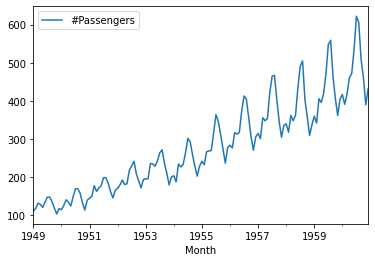

In [34]:
df1.plot()

In [25]:
mod = mod.fit(df1)

Inferred frequency is: MS
Model Number: 1 with model ARIMA in generation 0 of 10
Model Number: 2 with model ARIMA in generation 0 of 10
Model Number: 3 with model ARIMA in generation 0 of 10
Model Number: 4 with model AverageValueNaive in generation 0 of 10
Model Number: 5 with model AverageValueNaive in generation 0 of 10
Model Number: 6 with model AverageValueNaive in generation 0 of 10
Model Number: 7 with model DatepartRegression in generation 0 of 10
Model Number: 8 with model DatepartRegression in generation 0 of 10
Model Number: 9 with model DatepartRegression in generation 0 of 10
Model Number: 10 with model DatepartRegression in generation 0 of 10
Template Eval Error: ImportError('Tensorflow not available, install with pip install tensorflow.') in model 10: DatepartRegression
Model Number: 11 with model ETS in generation 0 of 10
Model Number: 12 with model ETS in generation 0 of 10
Model Number: 13 with model GLM in generation 0 of 10
Model Number: 14 with model GLM in generat

[Parallel(n_jobs=-2)]: Using backend ThreadingBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  36 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-2)]: Done 186 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=7)]: Using backend ThreadingBackend with 7 concurrent workers.
[Parallel(n_jobs=7)]: Done  36 tasks      | elapsed:    0.0s
[Parallel(n_jobs=7)]: Done 186 tasks      | elapsed:    0.0s
[Parallel(n_jobs=7)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=7)]: Using backend ThreadingBackend with 7 concurrent workers.
[Parallel(n_jobs=7)]: Done  36 tasks      | elapsed:    0.0s
[Parallel(n_jobs=7)]: Done 186 tasks      | elapsed:    0.0s
[Parallel(n_jobs=7)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=7)]: Using backend ThreadingBackend with 7 concurrent workers.
[Parallel(n_jobs=7)]: Done  36 tasks      | elapsed:    0.0s
[Parallel(n_jobs=7)]: Done 186 tasks   

Model Number: 41 with model MultivariateRegression in generation 0 of 10
Template Eval Error: ValueError("regression_type='User' but not future_regressor supplied.") in model 41: MultivariateRegression
Model Number: 42 with model DatepartRegression in generation 0 of 10
Template Eval Error: ValueError("regression_type='User' but no future_regressor passed") in model 42: DatepartRegression
Model Number: 43 with model SeasonalNaive in generation 0 of 10


[Parallel(n_jobs=7)]: Done  36 tasks      | elapsed:    0.0s
[Parallel(n_jobs=7)]: Done 186 tasks      | elapsed:    0.0s
[Parallel(n_jobs=7)]: Done 200 out of 200 | elapsed:    0.0s finished


Model Number: 44 with model DatepartRegression in generation 0 of 10
Model Number: 45 with model UnobservedComponents in generation 0 of 10
Model Number: 46 with model UnobservedComponents in generation 0 of 10
Model Number: 47 with model ETS in generation 0 of 10
Model Number: 48 with model VECM in generation 0 of 10
Template Eval Error: ValueError('Only gave one variable to VECM') in model 48: VECM
Model Number: 49 with model ARDL in generation 0 of 10
Model Number: 50 with model MultivariateMotif in generation 0 of 10
Model Number: 51 with model MultivariateMotif in generation 0 of 10
Model Number: 52 with model UnivariateMotif in generation 0 of 10
Model Number: 53 with model UnivariateMotif in generation 0 of 10
Model Number: 54 with model SectionalMotif in generation 0 of 10
Model Number: 55 with model SectionalMotif in generation 0 of 10
Model Number: 56 with model MultivariateRegression in generation 0 of 10
Model Number: 57 with model FBProphet in generation 0 of 10
Template E

[Parallel(n_jobs=-2)]: Using backend ThreadingBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  36 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=7)]: Using backend ThreadingBackend with 7 concurrent workers.
[Parallel(n_jobs=7)]: Done  36 tasks      | elapsed:    0.0s
[Parallel(n_jobs=7)]: Done 100 out of 100 | elapsed:    0.0s finished


Model Number: 61 with model Theta in generation 0 of 10
Model Number: 62 with model UnivariateRegression in generation 0 of 10
Template Eval Error: ValueError("Input contains NaN, infinity or a value too large for dtype('float32').") in model 62: UnivariateRegression
Model Number: 63 with model ARCH in generation 0 of 10
Template Eval Error: ImportError('`arch` package must be installed from pip') in model 63: ARCH
Model Number: 64 with model ConstantNaive in generation 0 of 10
Model Number: 65 with model LastValueNaive in generation 0 of 10
Template Eval Error: Exception('Transformer HolidayTransformer failed on fit') in model 65: LastValueNaive
Model Number: 66 with model AverageValueNaive in generation 0 of 10
Model Number: 67 with model GLS in generation 0 of 10
Model Number: 68 with model SeasonalNaive in generation 0 of 10
Model Number: 69 with model GLM in generation 0 of 10
Model Number: 70 with model ETS in generation 0 of 10
Model Number: 71 with model FBProphet in generation

Model Number: 137 with model MultivariateMotif in generation 0 of 10
No anomalies detected.
Model Number: 138 with model ConstantNaive in generation 0 of 10
Model Number: 139 with model VECM in generation 0 of 10
Template Eval Error: ValueError('Only gave one variable to VECM') in model 139: VECM
Model Number: 140 with model MultivariateMotif in generation 0 of 10
Model Number: 141 with model SectionalMotif in generation 0 of 10
Model Number: 142 with model UnobservedComponents in generation 0 of 10
Model Number: 143 with model SectionalMotif in generation 0 of 10
Model Number: 144 with model UnobservedComponents in generation 0 of 10
Model Number: 145 with model UnivariateMotif in generation 0 of 10
Model Number: 146 with model ETS in generation 0 of 10
Model Number: 147 with model LastValueNaive in generation 0 of 10
Model Number: 148 with model UnobservedComponents in generation 0 of 10
Model Number: 149 with model ETS in generation 0 of 10
Model Number: 150 with model GLM in genera

[Parallel(n_jobs=-2)]: Using backend ThreadingBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  36 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=7)]: Using backend ThreadingBackend with 7 concurrent workers.
[Parallel(n_jobs=7)]: Done  36 tasks      | elapsed:    0.0s
[Parallel(n_jobs=7)]: Done 100 out of 100 | elapsed:    0.0s finished


Model Number: 203 with model GLM in generation 1 of 10
Model Number: 204 with model ETS in generation 1 of 10
Model Number: 205 with model Theta in generation 1 of 10
Model Number: 206 with model LastValueNaive in generation 1 of 10
Model Number: 207 with model UnivariateMotif in generation 1 of 10
Model Number: 208 with model ETS in generation 1 of 10
Model Number: 209 with model ARIMA in generation 1 of 10
Model Number: 210 with model ETS in generation 1 of 10
Model Number: 211 with model GLS in generation 1 of 10
Model Number: 212 with model WindowRegression in generation 1 of 10
Template Eval Error: ModuleNotFoundError("No module named 'xgboost'") in model 212: WindowRegression
Model Number: 213 with model SeasonalNaive in generation 1 of 10
Model Number: 214 with model ARDL in generation 1 of 10
Model Number: 215 with model Theta in generation 1 of 10
Model Number: 216 with model Theta in generation 1 of 10
Model Number: 217 with model DatepartRegression in generation 1 of 10
Mode

[Parallel(n_jobs=-2)]: Using backend ThreadingBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  36 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=7)]: Using backend ThreadingBackend with 7 concurrent workers.
[Parallel(n_jobs=7)]: Done  36 tasks      | elapsed:    0.0s
[Parallel(n_jobs=7)]: Done 100 out of 100 | elapsed:    0.0s finished


Model Number: 221 with model MultivariateMotif in generation 1 of 10
Model Number: 222 with model SectionalMotif in generation 1 of 10
Model Number: 223 with model ARIMA in generation 1 of 10
Model Number: 224 with model UnobservedComponents in generation 1 of 10
Model Number: 225 with model GLM in generation 1 of 10
Template Eval Error: ValueError("Model returned NaN due to a preprocessing transformer {'fillna': 'linear', 'transformations': {'0': 'StandardScaler', '1': 'AlignLastValue'}, 'transformation_params': {'0': {}, '1': {'rows': 4, 'lag': 1, 'method': 'multiplicative', 'strength': 1.0}}}. fail_on_forecast_nan=True") in model 225: GLM
Model Number: 226 with model DatepartRegression in generation 1 of 10
Template Eval Error: ValueError("regression_type='User' but no future_regressor passed") in model 226: DatepartRegression
Model Number: 227 with model GLM in generation 1 of 10
Model Number: 228 with model GLS in generation 1 of 10
Model Number: 229 with model SeasonalNaive in ge

[Parallel(n_jobs=-2)]: Using backend ThreadingBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  36 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=7)]: Using backend ThreadingBackend with 7 concurrent workers.
[Parallel(n_jobs=7)]: Done  36 tasks      | elapsed:    0.0s
[Parallel(n_jobs=7)]: Done 100 out of 100 | elapsed:    0.0s finished


Model Number: 280 with model AverageValueNaive in generation 1 of 10
Model Number: 281 with model MultivariateRegression in generation 1 of 10
Model Number: 282 with model SeasonalNaive in generation 1 of 10
Model Number: 283 with model ARIMA in generation 1 of 10
Model Number: 284 with model ARIMA in generation 1 of 10
Model Number: 285 with model UnobservedComponents in generation 1 of 10
Model Number: 286 with model AverageValueNaive in generation 1 of 10
Model Number: 287 with model ConstantNaive in generation 1 of 10
Model Number: 288 with model UnobservedComponents in generation 1 of 10
Template Eval Error: ValueError("regression_type='User' but no future_regressor supplied") in model 288: UnobservedComponents
Model Number: 289 with model SectionalMotif in generation 1 of 10
Model Number: 290 with model ARIMA in generation 1 of 10
Model Number: 291 with model SeasonalNaive in generation 1 of 10
Template Eval Error: Exception('Transformer DifferencedTransformer failed on inverse')

[Parallel(n_jobs=-2)]: Using backend ThreadingBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  36 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-2)]: Done 186 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=7)]: Using backend ThreadingBackend with 7 concurrent workers.
[Parallel(n_jobs=7)]: Done  36 tasks      | elapsed:    0.0s
[Parallel(n_jobs=7)]: Done 186 tasks      | elapsed:    0.0s
[Parallel(n_jobs=7)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=7)]: Using backend ThreadingBackend with 7 concurrent workers.
[Parallel(n_jobs=7)]: Done  36 tasks      | elapsed:    0.0s
[Parallel(n_jobs=7)]: Done 186 tasks      | elapsed:    0.0s
[Parallel(n_jobs=7)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=7)]: Using backend ThreadingBackend with 7 concurrent workers.
[Parallel(n_jobs=7)]: Done  36 tasks      | elapsed:    0.0s
[Parallel(n_jobs=7)]: Done 186 tasks   

Model Number: 308 with model MultivariateRegression in generation 2 of 10
Model Number: 309 with model MultivariateMotif in generation 2 of 10


[Parallel(n_jobs=7)]: Done 186 tasks      | elapsed:    0.0s
[Parallel(n_jobs=7)]: Done 200 out of 200 | elapsed:    0.0s finished


Model Number: 310 with model MultivariateRegression in generation 2 of 10
Template Eval Error: Exception('Transformer Detrend failed on fit') in model 310: MultivariateRegression
Model Number: 311 with model ETS in generation 2 of 10
Model Number: 312 with model DatepartRegression in generation 2 of 10
Model Number: 313 with model UnivariateRegression in generation 2 of 10
Model Number: 314 with model LastValueNaive in generation 2 of 10
Template Eval Error: Exception('Transformer RobustScaler failed on fit') in model 314: LastValueNaive
Model Number: 315 with model MultivariateMotif in generation 2 of 10
Model Number: 316 with model LastValueNaive in generation 2 of 10
Model Number: 317 with model AverageValueNaive in generation 2 of 10
Model Number: 318 with model WindowRegression in generation 2 of 10
Model Number: 319 with model SeasonalNaive in generation 2 of 10
Template Eval Error: Exception('Transformer DatepartRegression failed on fit') in model 319: SeasonalNaive
Model Number

[Parallel(n_jobs=-2)]: Using backend ThreadingBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  36 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-2)]: Done 186 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=7)]: Using backend ThreadingBackend with 7 concurrent workers.
[Parallel(n_jobs=7)]: Done  36 tasks      | elapsed:    0.0s
[Parallel(n_jobs=7)]: Done 186 tasks      | elapsed:    0.0s
[Parallel(n_jobs=7)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=7)]: Using backend ThreadingBackend with 7 concurrent workers.
[Parallel(n_jobs=7)]: Done  36 tasks      | elapsed:    0.0s
[Parallel(n_jobs=7)]: Done 186 tasks      | elapsed:    0.0s
[Parallel(n_jobs=7)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=7)]: Using backend ThreadingBackend with 7 concurrent workers.
[Parallel(n_jobs=7)]: Done  36 tasks      | elapsed:    0.0s
[Parallel(n_jobs=7)]: Done 186 tasks   

Model Number: 333 with model UnivariateRegression in generation 2 of 10
Model Number: 334 with model ConstantNaive in generation 2 of 10
Model Number: 335 with model LastValueNaive in generation 2 of 10


[Parallel(n_jobs=7)]: Using backend ThreadingBackend with 7 concurrent workers.
[Parallel(n_jobs=7)]: Done  36 tasks      | elapsed:    0.0s
[Parallel(n_jobs=7)]: Done 186 tasks      | elapsed:    0.0s
[Parallel(n_jobs=7)]: Done 200 out of 200 | elapsed:    0.0s finished


Model Number: 336 with model ARIMA in generation 2 of 10
Model Number: 337 with model ARIMA in generation 2 of 10
Model Number: 338 with model Theta in generation 2 of 10
Model Number: 339 with model GLS in generation 2 of 10
Model Number: 340 with model ARIMA in generation 2 of 10
Model Number: 341 with model LastValueNaive in generation 2 of 10
Model Number: 342 with model GLS in generation 2 of 10
Model Number: 343 with model Theta in generation 2 of 10
Model Number: 344 with model DatepartRegression in generation 2 of 10
Template Eval Error: Exception('Transformer Cointegration failed on fit') in model 344: DatepartRegression
Model Number: 345 with model Theta in generation 2 of 10
Model Number: 346 with model AverageValueNaive in generation 2 of 10
Model Number: 347 with model WindowRegression in generation 2 of 10
Template Eval Error: Exception('Transformer BTCD failed on fit') in model 347: WindowRegression
Model Number: 348 with model UnobservedComponents in generation 2 of 10


[Parallel(n_jobs=-2)]: Using backend ThreadingBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  36 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=7)]: Using backend ThreadingBackend with 7 concurrent workers.
[Parallel(n_jobs=7)]: Done  36 tasks      | elapsed:    0.0s
[Parallel(n_jobs=7)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=7)]: Using backend ThreadingBackend with 7 concurrent workers.
[Parallel(n_jobs=7)]: Done  36 tasks      | elapsed:    0.0s
[Parallel(n_jobs=7)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=7)]: Using backend ThreadingBackend with 7 concurrent workers.
[Parallel(n_jobs=7)]: Done  36 tasks      | elapsed:    0.0s
[Parallel(n_jobs=7)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=7)]: Using backend ThreadingBackend with 7 concurrent workers.
[Parallel(n_jobs=7)]: Done  36 tasks      | elapsed:    0.0s
[Parallel(n_

Model Number: 368 with model SeasonalNaive in generation 2 of 10
Model Number: 369 with model UnivariateRegression in generation 2 of 10
Model Number: 370 with model SeasonalNaive in generation 2 of 10


[Parallel(n_jobs=7)]: Done  36 tasks      | elapsed:    0.0s
[Parallel(n_jobs=7)]: Done 100 out of 100 | elapsed:    0.0s finished


Model Number: 371 with model UnobservedComponents in generation 2 of 10
Model Number: 372 with model ETS in generation 2 of 10
Model Number: 373 with model DatepartRegression in generation 2 of 10
Template Eval Error: Exception('Transformer BTCD failed on fit') in model 373: DatepartRegression
Model Number: 374 with model SectionalMotif in generation 2 of 10
Model Number: 375 with model ConstantNaive in generation 2 of 10
Model Number: 376 with model NVAR in generation 2 of 10
Model Number: 377 with model ARIMA in generation 2 of 10
Model Number: 378 with model ARDL in generation 2 of 10
Model Number: 379 with model GLM in generation 2 of 10
Model Number: 380 with model GLM in generation 2 of 10
Template Eval Error: ValueError('NaN, inf or invalid value detected in weights, estimation infeasible.') in model 380: GLM
Model Number: 381 with model SectionalMotif in generation 2 of 10
Model Number: 382 with model SectionalMotif in generation 2 of 10
Model Number: 383 with model ConstantNai

[Parallel(n_jobs=-2)]: Using backend ThreadingBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  36 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=7)]: Using backend ThreadingBackend with 7 concurrent workers.
[Parallel(n_jobs=7)]: Done  36 tasks      | elapsed:    0.0s
[Parallel(n_jobs=7)]: Done 100 out of 100 | elapsed:    0.0s finished


Model Number: 448 with model Theta in generation 3 of 10
Model Number: 449 with model ARIMA in generation 3 of 10
Model Number: 450 with model DatepartRegression in generation 3 of 10
Model Number: 451 with model DatepartRegression in generation 3 of 10


[Parallel(n_jobs=-2)]: Using backend ThreadingBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  36 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-2)]: Done 186 tasks      | elapsed:    0.1s


Model Number: 452 with model ARDL in generation 3 of 10
Model Number: 453 with model SeasonalNaive in generation 3 of 10


[Parallel(n_jobs=-2)]: Done 300 out of 300 | elapsed:    0.2s finished
[Parallel(n_jobs=7)]: Using backend ThreadingBackend with 7 concurrent workers.
[Parallel(n_jobs=7)]: Done  36 tasks      | elapsed:    0.0s
[Parallel(n_jobs=7)]: Done 186 tasks      | elapsed:    0.0s
[Parallel(n_jobs=7)]: Done 300 out of 300 | elapsed:    0.0s finished


Model Number: 454 with model AverageValueNaive in generation 3 of 10
Model Number: 455 with model AverageValueNaive in generation 3 of 10
Model Number: 456 with model ARIMA in generation 3 of 10
Model Number: 457 with model SeasonalNaive in generation 3 of 10
Model Number: 458 with model DatepartRegression in generation 3 of 10


[Parallel(n_jobs=-2)]: Using backend ThreadingBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  36 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=7)]: Using backend ThreadingBackend with 7 concurrent workers.
[Parallel(n_jobs=7)]: Done  36 tasks      | elapsed:    0.0s
[Parallel(n_jobs=7)]: Done 100 out of 100 | elapsed:    0.0s finished


Model Number: 459 with model DatepartRegression in generation 3 of 10
Model Number: 460 with model ARDL in generation 3 of 10
Model Number: 461 with model ARDL in generation 3 of 10
Model Number: 462 with model GLS in generation 3 of 10
Model Number: 463 with model MultivariateRegression in generation 3 of 10


[Parallel(n_jobs=-2)]: Using backend ThreadingBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  36 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-2)]: Done 186 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.1s finished
[Parallel(n_jobs=7)]: Using backend ThreadingBackend with 7 concurrent workers.
[Parallel(n_jobs=7)]: Done  36 tasks      | elapsed:    0.0s
[Parallel(n_jobs=7)]: Done 186 tasks      | elapsed:    0.0s
[Parallel(n_jobs=7)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=7)]: Using backend ThreadingBackend with 7 concurrent workers.
[Parallel(n_jobs=7)]: Done  36 tasks      | elapsed:    0.0s
[Parallel(n_jobs=7)]: Done 186 tasks      | elapsed:    0.0s
[Parallel(n_jobs=7)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=7)]: Using backend ThreadingBackend with 7 concurrent workers.
[Parallel(n_jobs=7)]: Done  36 tasks      | elapsed:    0.0s
[Parallel(n_jobs=7)]: Done 186 tasks   

Model Number: 464 with model ETS in generation 3 of 10
ETS error ValueError('endog must be strictly positive when usingmultiplicative trend or seasonal components.')
ETS failed on #Passengers with ValueError('endog must be strictly positive when usingmultiplicative trend or seasonal components.')
Model Number: 465 with model SectionalMotif in generation 3 of 10


[Parallel(n_jobs=7)]: Using backend ThreadingBackend with 7 concurrent workers.
[Parallel(n_jobs=7)]: Done  36 tasks      | elapsed:    0.0s
[Parallel(n_jobs=7)]: Done 186 tasks      | elapsed:    0.0s
[Parallel(n_jobs=7)]: Done 200 out of 200 | elapsed:    0.0s finished


Model Number: 466 with model MultivariateRegression in generation 3 of 10
Model Number: 467 with model SeasonalNaive in generation 3 of 10
Model Number: 468 with model SeasonalNaive in generation 3 of 10
Model Number: 469 with model NVAR in generation 3 of 10
Model Number: 470 with model GLM in generation 3 of 10
Model Number: 471 with model ARIMA in generation 3 of 10
Model Number: 472 with model Theta in generation 3 of 10
Model Number: 473 with model ARDL in generation 3 of 10
Model Number: 474 with model ARDL in generation 3 of 10
Model Number: 475 with model MultivariateMotif in generation 3 of 10
Model Number: 476 with model AverageValueNaive in generation 3 of 10
Model Number: 477 with model SectionalMotif in generation 3 of 10
Model Number: 478 with model MultivariateRegression in generation 3 of 10
Model Number: 479 with model Theta in generation 3 of 10
Model Number: 480 with model ARIMA in generation 3 of 10
Model Number: 481 with model UnivariateRegression in generation 3 o

[Parallel(n_jobs=-2)]: Using backend ThreadingBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  36 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=7)]: Using backend ThreadingBackend with 7 concurrent workers.
[Parallel(n_jobs=7)]: Done  36 tasks      | elapsed:    0.0s
[Parallel(n_jobs=7)]: Done 100 out of 100 | elapsed:    0.0s finished


Model Number: 484 with model ARDL in generation 3 of 10
Model Number: 485 with model MultivariateMotif in generation 3 of 10
Model Number: 486 with model MultivariateMotif in generation 3 of 10
Model Number: 487 with model ETS in generation 3 of 10
Model Number: 488 with model Theta in generation 3 of 10
Model Number: 489 with model GLM in generation 3 of 10
Template Eval Error: ValueError('regression_type=user and no future_regressor passed') in model 489: GLM
Model Number: 490 with model UnivariateRegression in generation 3 of 10
Template Eval Error: ValueError("regression_type='User' but not future_regressor supplied.") in model 490: UnivariateRegression
Model Number: 491 with model MultivariateMotif in generation 3 of 10
Model Number: 492 with model ARDL in generation 3 of 10
Model Number: 493 with model LastValueNaive in generation 3 of 10
Model Number: 494 with model MultivariateRegression in generation 3 of 10
Model Number: 495 with model ARIMA in generation 3 of 10
Model Number

Model Number: 593 with model MultivariateRegression in generation 4 of 10
Model Number: 594 with model DatepartRegression in generation 4 of 10


[Parallel(n_jobs=-2)]: Using backend ThreadingBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  36 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=7)]: Using backend ThreadingBackend with 7 concurrent workers.
[Parallel(n_jobs=7)]: Done  36 tasks      | elapsed:    0.0s
[Parallel(n_jobs=7)]: Done 100 out of 100 | elapsed:    0.0s finished


Model Number: 595 with model DatepartRegression in generation 4 of 10
Model Number: 596 with model GLS in generation 4 of 10
Model Number: 597 with model DatepartRegression in generation 4 of 10
Template Eval Error: ImportError('Tensorflow not available, install with pip install tensorflow.') in model 597: DatepartRegression
Model Number: 598 with model UnivariateRegression in generation 4 of 10
Model Number: 599 with model SeasonalNaive in generation 4 of 10
Model Number: 600 with model NVAR in generation 4 of 10
Model Number: 601 with model Theta in generation 4 of 10
Model Number: 602 with model ARDL in generation 4 of 10
Model Number: 603 with model SectionalMotif in generation 4 of 10
Model Number: 604 with model WindowRegression in generation 4 of 10
Model Number: 605 with model UnivariateRegression in generation 4 of 10
Model Number: 606 with model GLS in generation 4 of 10
Model Number: 607 with model MultivariateRegression in generation 4 of 10
Model Number: 608 with model Sec

[Parallel(n_jobs=-2)]: Using backend ThreadingBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  36 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=7)]: Using backend ThreadingBackend with 7 concurrent workers.
[Parallel(n_jobs=7)]: Done  36 tasks      | elapsed:    0.0s
[Parallel(n_jobs=7)]: Done 100 out of 100 | elapsed:    0.0s finished


Model Number: 624 with model SeasonalNaive in generation 4 of 10
Template Eval Error: Exception('Transformer Cointegration failed on fit') in model 624: SeasonalNaive
Model Number: 625 with model GLM in generation 4 of 10
Model Number: 626 with model UnivariateMotif in generation 4 of 10
Template Eval Error: Exception('Transformer Detrend failed on fit') in model 626: UnivariateMotif
Model Number: 627 with model GLM in generation 4 of 10
Model Number: 628 with model UnobservedComponents in generation 4 of 10
Template Eval Error: ValueError("regression_type='User' but no future_regressor supplied") in model 628: UnobservedComponents
Model Number: 629 with model ARIMA in generation 4 of 10
Model Number: 630 with model MultivariateRegression in generation 4 of 10
Template Eval Error: ValueError("regression_type='User' but not future_regressor supplied.") in model 630: MultivariateRegression
Model Number: 631 with model UnivariateRegression in generation 4 of 10
Model Number: 632 with mode

[Parallel(n_jobs=-2)]: Using backend ThreadingBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  36 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=7)]: Using backend ThreadingBackend with 7 concurrent workers.
[Parallel(n_jobs=7)]: Done  36 tasks      | elapsed:    0.0s
[Parallel(n_jobs=7)]: Done 100 out of 100 | elapsed:    0.0s finished


Model Number: 715 with model ARIMA in generation 5 of 10
Model Number: 716 with model LastValueNaive in generation 5 of 10
Model Number: 717 with model ARDL in generation 5 of 10
Model Number: 718 with model MultivariateRegression in generation 5 of 10
Model Number: 719 with model Theta in generation 5 of 10
Model Number: 720 with model ETS in generation 5 of 10
Model Number: 721 with model SectionalMotif in generation 5 of 10
Model Number: 722 with model ARIMA in generation 5 of 10
Model Number: 723 with model ARDL in generation 5 of 10
Model Number: 724 with model Theta in generation 5 of 10
Model Number: 725 with model AverageValueNaive in generation 5 of 10
Model Number: 726 with model ARDL in generation 5 of 10
Model Number: 727 with model MultivariateMotif in generation 5 of 10
Model Number: 728 with model UnivariateRegression in generation 5 of 10
Template Eval Error: Exception('Transformer DatepartRegression failed on fit') in model 728: UnivariateRegression
Model Number: 729 w

[Parallel(n_jobs=-2)]: Using backend ThreadingBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  36 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=7)]: Using backend ThreadingBackend with 7 concurrent workers.
[Parallel(n_jobs=7)]: Done  36 tasks      | elapsed:    0.0s
[Parallel(n_jobs=7)]: Done 100 out of 100 | elapsed:    0.0s finished


Model Number: 804 with model MultivariateRegression in generation 6 of 10
Model Number: 805 with model MultivariateMotif in generation 6 of 10
Model Number: 806 with model SeasonalNaive in generation 6 of 10
Model Number: 807 with model LastValueNaive in generation 6 of 10
Model Number: 808 with model WindowRegression in generation 6 of 10
Model Number: 809 with model ARIMA in generation 6 of 10
Model Number: 810 with model MultivariateMotif in generation 6 of 10
Model Number: 811 with model NVAR in generation 6 of 10
Model Number: 812 with model MultivariateRegression in generation 6 of 10
Model Number: 813 with model ARIMA in generation 6 of 10
Model Number: 814 with model GLS in generation 6 of 10
Model Number: 815 with model MultivariateRegression in generation 6 of 10
Template Eval Error: ValueError("regression_type='User' but not future_regressor supplied.") in model 815: MultivariateRegression
Model Number: 816 with model WindowRegression in generation 6 of 10
Model Number: 817 

Model Number: 907 with model ARIMA in generation 7 of 10
Template Eval Error: KeyError(Timestamp('1949-01-01 00:00:00', freq='MS')) in model 907: ARIMA
Model Number: 908 with model ARDL in generation 7 of 10
Model Number: 909 with model ARIMA in generation 7 of 10
Model Number: 910 with model SectionalMotif in generation 7 of 10
Model Number: 911 with model NVAR in generation 7 of 10
Model Number: 912 with model MultivariateMotif in generation 7 of 10
Model Number: 913 with model SeasonalNaive in generation 7 of 10
Model Number: 914 with model MultivariateRegression in generation 7 of 10
Model Number: 915 with model ARDL in generation 7 of 10
Model Number: 916 with model MultivariateRegression in generation 7 of 10
Template Eval Error: ValueError("regression_type='User' but not future_regressor supplied.") in model 916: MultivariateRegression
Model Number: 917 with model MultivariateMotif in generation 7 of 10
Model Number: 918 with model SectionalMotif in generation 7 of 10
Model Numb

[Parallel(n_jobs=-2)]: Using backend ThreadingBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  36 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=7)]: Using backend ThreadingBackend with 7 concurrent workers.
[Parallel(n_jobs=7)]: Done  36 tasks      | elapsed:    0.0s
[Parallel(n_jobs=7)]: Done 100 out of 100 | elapsed:    0.0s finished


Model Number: 923 with model MultivariateRegression in generation 7 of 10
Template Eval Error: ModuleNotFoundError("No module named 'lightgbm'") in model 923: MultivariateRegression
Model Number: 924 with model UnivariateMotif in generation 7 of 10
Model Number: 925 with model ARDL in generation 7 of 10
Model Number: 926 with model WindowRegression in generation 7 of 10
Model Number: 927 with model UnivariateMotif in generation 7 of 10
Model Number: 928 with model WindowRegression in generation 7 of 10
Model Number: 929 with model ConstantNaive in generation 7 of 10
Model Number: 930 with model UnivariateRegression in generation 7 of 10
Model Number: 931 with model MultivariateMotif in generation 7 of 10
Model Number: 932 with model GLM in generation 7 of 10
Template Eval Error: ValueError('regression_type=user and no future_regressor passed') in model 932: GLM
Model Number: 933 with model MultivariateRegression in generation 7 of 10
Model Number: 934 with model MultivariateMotif in ge

[Parallel(n_jobs=-2)]: Using backend ThreadingBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  36 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=7)]: Using backend ThreadingBackend with 7 concurrent workers.
[Parallel(n_jobs=7)]: Done  36 tasks      | elapsed:    0.0s
[Parallel(n_jobs=7)]: Done 100 out of 100 | elapsed:    0.0s finished


Model Number: 962 with model Theta in generation 8 of 10
Model Number: 963 with model Theta in generation 8 of 10
Model Number: 964 with model UnobservedComponents in generation 8 of 10
Model Number: 965 with model MultivariateRegression in generation 8 of 10
Model Number: 966 with model UnivariateMotif in generation 8 of 10
Model Number: 967 with model SeasonalNaive in generation 8 of 10
Model Number: 968 with model AverageValueNaive in generation 8 of 10
Model Number: 969 with model GLM in generation 8 of 10
Model Number: 970 with model ARDL in generation 8 of 10
Template Eval Error: Exception('Transformer BTCD failed on fit') in model 970: ARDL
Model Number: 971 with model ARDL in generation 8 of 10
Model Number: 972 with model UnivariateMotif in generation 8 of 10
Model Number: 973 with model SectionalMotif in generation 8 of 10
Model Number: 974 with model MultivariateMotif in generation 8 of 10
Model Number: 975 with model GLS in generation 8 of 10
Model Number: 976 with model Th

[Parallel(n_jobs=-2)]: Using backend ThreadingBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  36 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=7)]: Using backend ThreadingBackend with 7 concurrent workers.
[Parallel(n_jobs=7)]: Done  36 tasks      | elapsed:    0.0s
[Parallel(n_jobs=7)]: Done 100 out of 100 | elapsed:    0.0s finished


Model Number: 1005 with model MultivariateRegression in generation 8 of 10
Model Number: 1006 with model ARDL in generation 8 of 10
Model Number: 1007 with model UnobservedComponents in generation 8 of 10
Model Number: 1008 with model MultivariateMotif in generation 8 of 10
Model Number: 1009 with model GLM in generation 8 of 10
Model Number: 1010 with model SectionalMotif in generation 8 of 10
Model Number: 1011 with model ARIMA in generation 8 of 10
Template Eval Error: Exception('Transformer Detrend failed on inverse') in model 1011: ARIMA
Model Number: 1012 with model ETS in generation 8 of 10
Model Number: 1013 with model DatepartRegression in generation 8 of 10
Model Number: 1014 with model UnivariateRegression in generation 8 of 10
Model Number: 1015 with model SectionalMotif in generation 8 of 10
Model Number: 1016 with model GLS in generation 8 of 10
Model Number: 1017 with model ARIMA in generation 8 of 10
Model Number: 1018 with model UnivariateMotif in generation 8 of 10
Mo

[Parallel(n_jobs=-2)]: Using backend ThreadingBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  36 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=7)]: Using backend ThreadingBackend with 7 concurrent workers.
[Parallel(n_jobs=7)]: Done  36 tasks      | elapsed:    0.0s
[Parallel(n_jobs=7)]: Done 100 out of 100 | elapsed:    0.0s finished



Model Number: 1054 with model MultivariateMotif in generation 9 of 10
Model Number: 1055 with model MultivariateRegression in generation 9 of 10
Model Number: 1056 with model GLS in generation 9 of 10
Model Number: 1057 with model SectionalMotif in generation 9 of 10
Model Number: 1058 with model Theta in generation 9 of 10
Model Number: 1059 with model ARDL in generation 9 of 10
Model Number: 1060 with model SectionalMotif in generation 9 of 10
Model Number: 1061 with model MultivariateMotif in generation 9 of 10
Model Number: 1062 with model Theta in generation 9 of 10
Model Number: 1063 with model ARIMA in generation 9 of 10
Model Number: 1064 with model UnivariateRegression in generation 9 of 10
Model Number: 1065 with model ARIMA in generation 9 of 10
Template Eval Error: ValueError("regression_type='User' but future_regressor not supplied") in model 1065: ARIMA
Model Number: 1066 with model SectionalMotif in generation 9 of 10
Model Number: 1067 with model MultivariateRegression

[Parallel(n_jobs=-2)]: Using backend ThreadingBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  36 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=7)]: Using backend ThreadingBackend with 7 concurrent workers.
[Parallel(n_jobs=7)]: Done  36 tasks      | elapsed:    0.0s
[Parallel(n_jobs=7)]: Done 100 out of 100 | elapsed:    0.0s finished


Model Number: 1083 with model UnobservedComponents in generation 9 of 10
Model Number: 1084 with model Theta in generation 9 of 10
Model Number: 1085 with model GLS in generation 9 of 10
Model Number: 1086 with model LastValueNaive in generation 9 of 10
Model Number: 1087 with model ARDL in generation 9 of 10
Model Number: 1088 with model SeasonalNaive in generation 9 of 10
Model Number: 1089 with model SectionalMotif in generation 9 of 10
Model Number: 1090 with model WindowRegression in generation 9 of 10
Template Eval Error: ModuleNotFoundError("No module named 'lightgbm'") in model 1090: WindowRegression
Model Number: 1091 with model UnivariateRegression in generation 9 of 10
Model Number: 1092 with model UnivariateRegression in generation 9 of 10
Model Number: 1093 with model ARIMA in generation 9 of 10
Model Number: 1094 with model MultivariateRegression in generation 9 of 10
Model Number: 1095 with model Theta in generation 9 of 10
Model Number: 1096 with model Theta in generati

[Parallel(n_jobs=-2)]: Using backend ThreadingBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  36 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=7)]: Using backend ThreadingBackend with 7 concurrent workers.
[Parallel(n_jobs=7)]: Done  36 tasks      | elapsed:    0.0s
[Parallel(n_jobs=7)]: Done 100 out of 100 | elapsed:    0.0s finished


Model Number: 1129 with model DatepartRegression in generation 9 of 10
Model Number: 1130 with model MultivariateMotif in generation 9 of 10
Model Number: 1131 with model WindowRegression in generation 9 of 10
Template Eval Error: ModuleNotFoundError("No module named 'lightgbm'") in model 1131: WindowRegression
Model Number: 1132 with model GLS in generation 9 of 10
Model Number: 1133 with model UnobservedComponents in generation 9 of 10
Model Number: 1134 with model UnivariateMotif in generation 9 of 10
Model Number: 1135 with model ARDL in generation 9 of 10
Model Number: 1136 with model SeasonalNaive in generation 9 of 10
Model Number: 1137 with model GLM in generation 9 of 10
Model Number: 1138 with model MultivariateRegression in generation 9 of 10
Model Number: 1139 with model GLM in generation 9 of 10
Model Number: 1140 with model GLM in generation 9 of 10
Template Eval Error: ValueError('NaN, inf or invalid value detected in weights, estimation infeasible.') in model 1140: GLM


[Parallel(n_jobs=-2)]: Using backend ThreadingBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  36 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=7)]: Using backend ThreadingBackend with 7 concurrent workers.
[Parallel(n_jobs=7)]: Done  36 tasks      | elapsed:    0.0s
[Parallel(n_jobs=7)]: Done 100 out of 100 | elapsed:    0.0s finished


Model Number: 1194 with model DatepartRegression in generation 10 of 10
Model Number: 1195 with model WindowRegression in generation 10 of 10
Model Number: 1196 with model UnivariateRegression in generation 10 of 10
Model Number: 1197 with model MultivariateRegression in generation 10 of 10
Model Number: 1198 with model UnivariateRegression in generation 10 of 10
Model Number: 1199 with model MultivariateMotif in generation 10 of 10
Model Number: 1200 with model AverageValueNaive in generation 10 of 10
Model Number: 1201 with model WindowRegression in generation 10 of 10
Template Eval Error: Exception('Transformer Cointegration failed on fit') in model 1201: WindowRegression
Model Number: 1202 with model UnivariateMotif in generation 10 of 10
Model Number: 1203 with model ARIMA in generation 10 of 10
Model Number: 1204 with model MultivariateRegression in generation 10 of 10
Template Eval Error: ModuleNotFoundError("No module named 'lightgbm'") in model 1204: MultivariateRegression
Mod

[Parallel(n_jobs=-2)]: Using backend ThreadingBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  36 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=7)]: Using backend ThreadingBackend with 7 concurrent workers.
[Parallel(n_jobs=7)]: Done  36 tasks      | elapsed:    0.0s
[Parallel(n_jobs=7)]: Done 100 out of 100 | elapsed:    0.0s finished


Model Number: 1216 with model Ensemble in generation 11 of Ensembles
Model Number: 1217 with model Ensemble in generation 11 of Ensembles
Model Number: 1218 with model Ensemble in generation 11 of Ensembles
Model Number: 1219 with model Ensemble in generation 11 of Ensembles
Model Number: 1220 with model Ensemble in generation 11 of Ensembles
Model Number: 1221 with model Ensemble in generation 11 of Ensembles
Model Number: 1222 with model Ensemble in generation 11 of Ensembles
Model Number: 1223 with model Ensemble in generation 11 of Ensembles
Model Number: 1224 with model Ensemble in generation 11 of Ensembles
Model Number: 1225 with model Ensemble in generation 11 of Ensembles
Validation Round: 1
Model Number: 1 of 180 with model ARIMA for Validation 1
📈 1 - ARIMA with avg smape 7.85: 
Model Number: 2 of 180 with model ARIMA for Validation 1
2 - ARIMA with avg smape 7.85: 
Model Number: 3 of 180 with model Ensemble for Validation 1
3 - Ensemble with avg smape 7.85: 
Model Number: 4

[Parallel(n_jobs=-2)]: Using backend ThreadingBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  36 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=7)]: Using backend ThreadingBackend with 7 concurrent workers.
[Parallel(n_jobs=7)]: Done  36 tasks      | elapsed:    0.0s
[Parallel(n_jobs=7)]: Done 100 out of 100 | elapsed:    0.0s finished


36 - UnivariateRegression with avg smape 10.08: 
Model Number: 37 of 180 with model DatepartRegression for Validation 1
37 - DatepartRegression with avg smape 5.96: 
Model Number: 38 of 180 with model Theta for Validation 1


[Parallel(n_jobs=-2)]: Using backend ThreadingBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  36 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=7)]: Using backend ThreadingBackend with 7 concurrent workers.
[Parallel(n_jobs=7)]: Done  36 tasks      | elapsed:    0.0s
[Parallel(n_jobs=7)]: Done 100 out of 100 | elapsed:    0.0s finished


38 - Theta with avg smape 6.78: 
Model Number: 39 of 180 with model Theta for Validation 1
39 - Theta with avg smape 6.78: 
Model Number: 40 of 180 with model Theta for Validation 1
40 - Theta with avg smape 6.78: 
Model Number: 41 of 180 with model Theta for Validation 1
41 - Theta with avg smape 6.78: 
Model Number: 42 of 180 with model Theta for Validation 1
42 - Theta with avg smape 6.78: 
Model Number: 43 of 180 with model WindowRegression for Validation 1
43 - WindowRegression with avg smape 10.07: 
Model Number: 44 of 180 with model WindowRegression for Validation 1
44 - WindowRegression with avg smape 10.07: 
Model Number: 45 of 180 with model WindowRegression for Validation 1
45 - WindowRegression with avg smape 10.07: 
Model Number: 46 of 180 with model WindowRegression for Validation 1
46 - WindowRegression with avg smape 13.06: 
Model Number: 47 of 180 with model MultivariateRegression for Validation 1
47 - MultivariateRegression with avg smape 8.81: 
Model Number: 48 of 18

[Parallel(n_jobs=-2)]: Using backend ThreadingBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  36 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=7)]: Using backend ThreadingBackend with 7 concurrent workers.
[Parallel(n_jobs=7)]: Done  36 tasks      | elapsed:    0.0s
[Parallel(n_jobs=7)]: Done 100 out of 100 | elapsed:    0.0s finished


99 - SeasonalNaive with avg smape 10.21: 
Model Number: 100 of 180 with model SeasonalNaive for Validation 1
100 - SeasonalNaive with avg smape 14.94: 
Model Number: 101 of 180 with model UnivariateMotif for Validation 1
101 - UnivariateMotif with avg smape 11.09: 
Model Number: 102 of 180 with model ARDL for Validation 1
102 - ARDL with avg smape 8.79: 
Model Number: 103 of 180 with model ARDL for Validation 1
103 - ARDL with avg smape 8.79: 
Model Number: 104 of 180 with model Ensemble for Validation 1
104 - Ensemble with avg smape 18.08: 
Model Number: 105 of 180 with model ARDL for Validation 1
105 - ARDL with avg smape 8.8: 
Model Number: 106 of 180 with model ETS for Validation 1
ETS error ValueError('Can only dampen the trend component')
ETS failed on #Passengers with ValueError('Can only dampen the trend component')
106 - ETS with avg smape 7.41: 
Model Number: 107 of 180 with model ETS for Validation 1
107 - ETS with avg smape 34.23: 
Model Number: 108 of 180 with model ARDL f

[Parallel(n_jobs=-2)]: Using backend ThreadingBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  36 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=7)]: Using backend ThreadingBackend with 7 concurrent workers.
[Parallel(n_jobs=7)]: Done  36 tasks      | elapsed:    0.0s
[Parallel(n_jobs=7)]: Done 100 out of 100 | elapsed:    0.0s finished


123 - ETS with avg smape 5.59: 
Model Number: 124 of 180 with model AverageValueNaive for Validation 1
124 - AverageValueNaive with avg smape 8.04: 
Model Number: 125 of 180 with model AverageValueNaive for Validation 1
125 - AverageValueNaive with avg smape 8.04: 
Model Number: 126 of 180 with model GLS for Validation 1
126 - GLS with avg smape 8.08: 
Model Number: 127 of 180 with model GLS for Validation 1
127 - GLS with avg smape 8.08: 
Model Number: 128 of 180 with model SeasonalNaive for Validation 1
128 - SeasonalNaive with avg smape 19.65: 
Model Number: 129 of 180 with model AverageValueNaive for Validation 1
129 - AverageValueNaive with avg smape 8.1: 
Model Number: 130 of 180 with model AverageValueNaive for Validation 1
130 - AverageValueNaive with avg smape 8.1: 
Model Number: 131 of 180 with model DatepartRegression for Validation 1
131 - DatepartRegression with avg smape 9.54: 
Model Number: 132 of 180 with model GLM for Validation 1


[Parallel(n_jobs=-2)]: Using backend ThreadingBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  36 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=7)]: Using backend ThreadingBackend with 7 concurrent workers.
[Parallel(n_jobs=7)]: Done  36 tasks      | elapsed:    0.0s
[Parallel(n_jobs=7)]: Done 100 out of 100 | elapsed:    0.0s finished


132 - GLM with avg smape 6.16: 
Model Number: 133 of 180 with model DatepartRegression for Validation 1
133 - DatepartRegression with avg smape 9.06: 
Model Number: 134 of 180 with model ConstantNaive for Validation 1
134 - ConstantNaive with avg smape 7.62: 
Model Number: 135 of 180 with model ConstantNaive for Validation 1
135 - ConstantNaive with avg smape 7.62: 
Model Number: 136 of 180 with model ConstantNaive for Validation 1
136 - ConstantNaive with avg smape 7.62: 
Model Number: 137 of 180 with model DatepartRegression for Validation 1
137 - DatepartRegression with avg smape 11.73: 
Model Number: 138 of 180 with model DatepartRegression for Validation 1


[Parallel(n_jobs=-2)]: Using backend ThreadingBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  36 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=7)]: Using backend ThreadingBackend with 7 concurrent workers.
[Parallel(n_jobs=7)]: Done  36 tasks      | elapsed:    0.0s
[Parallel(n_jobs=7)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=-2)]: Using backend ThreadingBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  36 tasks      | elapsed:    0.0s


138 - DatepartRegression with avg smape 40.34: 
Model Number: 139 of 180 with model AverageValueNaive for Validation 1
139 - AverageValueNaive with avg smape 28.72: 
Model Number: 140 of 180 with model LastValueNaive for Validation 1
140 - LastValueNaive with avg smape 19.16: 
Model Number: 141 of 180 with model GLS for Validation 1


[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=7)]: Using backend ThreadingBackend with 7 concurrent workers.
[Parallel(n_jobs=7)]: Done  36 tasks      | elapsed:    0.0s
[Parallel(n_jobs=7)]: Done 100 out of 100 | elapsed:    0.0s finished


141 - GLS with avg smape 8.85: 
Model Number: 142 of 180 with model LastValueNaive for Validation 1
142 - LastValueNaive with avg smape 29.35: 
Model Number: 143 of 180 with model LastValueNaive for Validation 1
143 - LastValueNaive with avg smape 29.35: 
Model Number: 144 of 180 with model LastValueNaive for Validation 1
144 - LastValueNaive with avg smape 29.35: 
Model Number: 145 of 180 with model LastValueNaive for Validation 1
145 - LastValueNaive with avg smape 26.65: 
Model Number: 146 of 180 with model UnobservedComponents for Validation 1
146 - UnobservedComponents with avg smape 26.5: 
Model Number: 147 of 180 with model ETS for Validation 1
147 - ETS with avg smape 27.14: 
Model Number: 148 of 180 with model ETS for Validation 1
ETS error ValueError('Can only dampen the trend component')
ETS failed on #Passengers with ValueError('Can only dampen the trend component')
148 - ETS with avg smape 12.11: 
Model Number: 149 of 180 with model AverageValueNaive for Validation 1
149 -

[Parallel(n_jobs=-2)]: Using backend ThreadingBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  36 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=7)]: Using backend ThreadingBackend with 7 concurrent workers.
[Parallel(n_jobs=7)]: Done  36 tasks      | elapsed:    0.0s
[Parallel(n_jobs=7)]: Done 100 out of 100 | elapsed:    0.0s finished


36 - UnivariateRegression with avg smape 9.88: 
Model Number: 37 of 180 with model DatepartRegression for Validation 2
37 - DatepartRegression with avg smape 6.19: 
Model Number: 38 of 180 with model Theta for Validation 2


[Parallel(n_jobs=-2)]: Using backend ThreadingBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  36 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=7)]: Using backend ThreadingBackend with 7 concurrent workers.
[Parallel(n_jobs=7)]: Done  36 tasks      | elapsed:    0.0s
[Parallel(n_jobs=7)]: Done 100 out of 100 | elapsed:    0.0s finished


38 - Theta with avg smape 4.95: 
Model Number: 39 of 180 with model Theta for Validation 2
39 - Theta with avg smape 4.95: 
Model Number: 40 of 180 with model Theta for Validation 2
40 - Theta with avg smape 4.95: 
Model Number: 41 of 180 with model Theta for Validation 2
41 - Theta with avg smape 4.95: 
Model Number: 42 of 180 with model Theta for Validation 2
42 - Theta with avg smape 4.95: 
Model Number: 43 of 180 with model WindowRegression for Validation 2
43 - WindowRegression with avg smape 7.82: 
Model Number: 44 of 180 with model WindowRegression for Validation 2
44 - WindowRegression with avg smape 7.82: 
Model Number: 45 of 180 with model WindowRegression for Validation 2
45 - WindowRegression with avg smape 7.82: 
Model Number: 46 of 180 with model WindowRegression for Validation 2
46 - WindowRegression with avg smape 16.18: 
Model Number: 47 of 180 with model MultivariateRegression for Validation 2
47 - MultivariateRegression with avg smape 5.44: 
Model Number: 48 of 180 w

[Parallel(n_jobs=-2)]: Using backend ThreadingBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  36 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=7)]: Using backend ThreadingBackend with 7 concurrent workers.
[Parallel(n_jobs=7)]: Done  36 tasks      | elapsed:    0.0s
[Parallel(n_jobs=7)]: Done 100 out of 100 | elapsed:    0.0s finished


99 - SeasonalNaive with avg smape 186.52: 
Model Number: 100 of 180 with model SeasonalNaive for Validation 2
100 - SeasonalNaive with avg smape 11.68: 
Model Number: 101 of 180 with model UnivariateMotif for Validation 2
101 - UnivariateMotif with avg smape 10.32: 
Model Number: 102 of 180 with model ARDL for Validation 2
102 - ARDL with avg smape 8.92: 
Model Number: 103 of 180 with model ARDL for Validation 2
103 - ARDL with avg smape 8.92: 
Model Number: 104 of 180 with model Ensemble for Validation 2
104 - Ensemble with avg smape 17.09: 
Model Number: 105 of 180 with model ARDL for Validation 2
105 - ARDL with avg smape 8.93: 
Model Number: 106 of 180 with model ETS for Validation 2
ETS error ValueError('Can only dampen the trend component')
ETS failed on #Passengers with ValueError('Can only dampen the trend component')
106 - ETS with avg smape 7.53: 
Model Number: 107 of 180 with model ETS for Validation 2
107 - ETS with avg smape 27.45: 
Model Number: 108 of 180 with model ARDL

[Parallel(n_jobs=-2)]: Using backend ThreadingBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  36 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=7)]: Using backend ThreadingBackend with 7 concurrent workers.
[Parallel(n_jobs=7)]: Done  36 tasks      | elapsed:    0.0s
[Parallel(n_jobs=7)]: Done 100 out of 100 | elapsed:    0.0s finished


123 - ETS with avg smape 5.22: 
Model Number: 124 of 180 with model AverageValueNaive for Validation 2
124 - AverageValueNaive with avg smape 10.35: 
Model Number: 125 of 180 with model AverageValueNaive for Validation 2
125 - AverageValueNaive with avg smape 10.35: 
Model Number: 126 of 180 with model GLS for Validation 2
126 - GLS with avg smape 10.37: 
Model Number: 127 of 180 with model GLS for Validation 2
127 - GLS with avg smape 10.37: 
Model Number: 128 of 180 with model SeasonalNaive for Validation 2
128 - SeasonalNaive with avg smape 13.72: 
Model Number: 129 of 180 with model AverageValueNaive for Validation 2
129 - AverageValueNaive with avg smape 10.51: 
Model Number: 130 of 180 with model AverageValueNaive for Validation 2
130 - AverageValueNaive with avg smape 10.51: 
Model Number: 131 of 180 with model DatepartRegression for Validation 2
131 - DatepartRegression with avg smape 11.01: 
Model Number: 132 of 180 with model GLM for Validation 2


[Parallel(n_jobs=-2)]: Using backend ThreadingBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  36 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=7)]: Using backend ThreadingBackend with 7 concurrent workers.
[Parallel(n_jobs=7)]: Done  36 tasks      | elapsed:    0.0s
[Parallel(n_jobs=7)]: Done 100 out of 100 | elapsed:    0.0s finished


132 - GLM with avg smape 9.5: 
Model Number: 133 of 180 with model DatepartRegression for Validation 2
133 - DatepartRegression with avg smape 10.07: 
Model Number: 134 of 180 with model ConstantNaive for Validation 2
134 - ConstantNaive with avg smape 9.0: 
Model Number: 135 of 180 with model ConstantNaive for Validation 2
135 - ConstantNaive with avg smape 9.0: 
Model Number: 136 of 180 with model ConstantNaive for Validation 2
136 - ConstantNaive with avg smape 9.0: 
Model Number: 137 of 180 with model DatepartRegression for Validation 2
137 - DatepartRegression with avg smape 11.65: 
Model Number: 138 of 180 with model DatepartRegression for Validation 2


[Parallel(n_jobs=-2)]: Using backend ThreadingBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  36 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=7)]: Using backend ThreadingBackend with 7 concurrent workers.
[Parallel(n_jobs=7)]: Done  36 tasks      | elapsed:    0.0s
[Parallel(n_jobs=7)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=-2)]: Using backend ThreadingBackend with 7 concurrent workers.


138 - DatepartRegression with avg smape 25.38: 
Model Number: 139 of 180 with model AverageValueNaive for Validation 2
139 - AverageValueNaive with avg smape 19.19: 
Model Number: 140 of 180 with model LastValueNaive for Validation 2
140 - LastValueNaive with avg smape 12.02: 
Model Number: 141 of 180 with model GLS for Validation 2
141 - GLS with avg smape 8.74: 
Model Number: 142 of 180 with model LastValueNaive for Validation 2


[Parallel(n_jobs=-2)]: Done  36 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=7)]: Using backend ThreadingBackend with 7 concurrent workers.
[Parallel(n_jobs=7)]: Done  36 tasks      | elapsed:    0.0s
[Parallel(n_jobs=7)]: Done 100 out of 100 | elapsed:    0.0s finished


142 - LastValueNaive with avg smape 19.69: 
Model Number: 143 of 180 with model LastValueNaive for Validation 2
143 - LastValueNaive with avg smape 19.69: 
Model Number: 144 of 180 with model LastValueNaive for Validation 2
144 - LastValueNaive with avg smape 19.69: 
Model Number: 145 of 180 with model LastValueNaive for Validation 2
145 - LastValueNaive with avg smape 19.43: 
Model Number: 146 of 180 with model UnobservedComponents for Validation 2
146 - UnobservedComponents with avg smape 17.9: 
Model Number: 147 of 180 with model ETS for Validation 2
147 - ETS with avg smape 18.87: 
Model Number: 148 of 180 with model ETS for Validation 2
ETS error ValueError('Can only dampen the trend component')
ETS failed on #Passengers with ValueError('Can only dampen the trend component')
148 - ETS with avg smape 13.85: 
Model Number: 149 of 180 with model AverageValueNaive for Validation 2
149 - AverageValueNaive with avg smape 14.86: 
Model Number: 150 of 180 with model LastValueNaive for Val

[Parallel(n_jobs=-2)]: Using backend ThreadingBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  36 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=7)]: Using backend ThreadingBackend with 7 concurrent workers.
[Parallel(n_jobs=7)]: Done  36 tasks      | elapsed:    0.0s
[Parallel(n_jobs=7)]: Done 100 out of 100 | elapsed:    0.0s finished


37 - DatepartRegression with avg smape 5.41: 
Model Number: 38 of 180 with model Theta for Validation 3


[Parallel(n_jobs=-2)]: Using backend ThreadingBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  36 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=7)]: Using backend ThreadingBackend with 7 concurrent workers.
[Parallel(n_jobs=7)]: Done  36 tasks      | elapsed:    0.0s
[Parallel(n_jobs=7)]: Done 100 out of 100 | elapsed:    0.0s finished


38 - Theta with avg smape 5.04: 
Model Number: 39 of 180 with model Theta for Validation 3
39 - Theta with avg smape 5.04: 
Model Number: 40 of 180 with model Theta for Validation 3
40 - Theta with avg smape 5.04: 
Model Number: 41 of 180 with model Theta for Validation 3
41 - Theta with avg smape 5.03: 
Model Number: 42 of 180 with model Theta for Validation 3
42 - Theta with avg smape 5.03: 
Model Number: 43 of 180 with model WindowRegression for Validation 3
43 - WindowRegression with avg smape 6.51: 
Model Number: 44 of 180 with model WindowRegression for Validation 3
44 - WindowRegression with avg smape 6.51: 
Model Number: 45 of 180 with model WindowRegression for Validation 3
45 - WindowRegression with avg smape 6.51: 
Model Number: 46 of 180 with model WindowRegression for Validation 3
46 - WindowRegression with avg smape 11.25: 
Model Number: 47 of 180 with model MultivariateRegression for Validation 3
47 - MultivariateRegression with avg smape 6.29: 
Model Number: 48 of 180 w

[Parallel(n_jobs=-2)]: Using backend ThreadingBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  36 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=7)]: Using backend ThreadingBackend with 7 concurrent workers.
[Parallel(n_jobs=7)]: Done  36 tasks      | elapsed:    0.0s
[Parallel(n_jobs=7)]: Done 100 out of 100 | elapsed:    0.0s finished


99 - SeasonalNaive with avg smape 39.84: 
Model Number: 100 of 180 with model SeasonalNaive for Validation 3
100 - SeasonalNaive with avg smape 22.48: 
Model Number: 101 of 180 with model UnivariateMotif for Validation 3
101 - UnivariateMotif with avg smape 7.73: 
Model Number: 102 of 180 with model ARDL for Validation 3
102 - ARDL with avg smape 8.92: 
Model Number: 103 of 180 with model ARDL for Validation 3
103 - ARDL with avg smape 8.92: 
Model Number: 104 of 180 with model Ensemble for Validation 3
104 - Ensemble with avg smape 10.57: 
Model Number: 105 of 180 with model ARDL for Validation 3
105 - ARDL with avg smape 8.94: 
Model Number: 106 of 180 with model ETS for Validation 3
ETS error ValueError('Can only dampen the trend component')
ETS failed on #Passengers with ValueError('Can only dampen the trend component')
106 - ETS with avg smape 10.55: 
Model Number: 107 of 180 with model ETS for Validation 3
107 - ETS with avg smape 24.07: 
Model Number: 108 of 180 with model ARDL 

[Parallel(n_jobs=-2)]: Using backend ThreadingBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  36 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=7)]: Using backend ThreadingBackend with 7 concurrent workers.
[Parallel(n_jobs=7)]: Done  36 tasks      | elapsed:    0.0s
[Parallel(n_jobs=7)]: Done 100 out of 100 | elapsed:    0.0s finished


123 - ETS with avg smape 3.53: 
Model Number: 124 of 180 with model AverageValueNaive for Validation 3
124 - AverageValueNaive with avg smape 10.73: 
Model Number: 125 of 180 with model AverageValueNaive for Validation 3
125 - AverageValueNaive with avg smape 10.73: 
Model Number: 126 of 180 with model GLS for Validation 3
126 - GLS with avg smape 10.86: 
Model Number: 127 of 180 with model GLS for Validation 3
127 - GLS with avg smape 10.86: 
Model Number: 128 of 180 with model SeasonalNaive for Validation 3
128 - SeasonalNaive with avg smape 8.83: 
Model Number: 129 of 180 with model AverageValueNaive for Validation 3
129 - AverageValueNaive with avg smape 11.1: 
Model Number: 130 of 180 with model AverageValueNaive for Validation 3
130 - AverageValueNaive with avg smape 11.1: 
Model Number: 131 of 180 with model DatepartRegression for Validation 3
131 - DatepartRegression with avg smape 7.73: 
Model Number: 132 of 180 with model GLM for Validation 3


[Parallel(n_jobs=-2)]: Using backend ThreadingBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  36 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=7)]: Using backend ThreadingBackend with 7 concurrent workers.
[Parallel(n_jobs=7)]: Done  36 tasks      | elapsed:    0.0s
[Parallel(n_jobs=7)]: Done 100 out of 100 | elapsed:    0.0s finished


132 - GLM with avg smape 12.28: 
Model Number: 133 of 180 with model DatepartRegression for Validation 3
133 - DatepartRegression with avg smape 11.35: 
Model Number: 134 of 180 with model ConstantNaive for Validation 3
134 - ConstantNaive with avg smape 10.57: 
Model Number: 135 of 180 with model ConstantNaive for Validation 3
135 - ConstantNaive with avg smape 10.57: 
Model Number: 136 of 180 with model ConstantNaive for Validation 3
136 - ConstantNaive with avg smape 10.57: 
Model Number: 137 of 180 with model DatepartRegression for Validation 3
137 - DatepartRegression with avg smape 15.12: 
Model Number: 138 of 180 with model DatepartRegression for Validation 3


[Parallel(n_jobs=-2)]: Using backend ThreadingBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  36 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=7)]: Using backend ThreadingBackend with 7 concurrent workers.
[Parallel(n_jobs=7)]: Done  36 tasks      | elapsed:    0.0s
[Parallel(n_jobs=7)]: Done 100 out of 100 | elapsed:    0.0s finished


138 - DatepartRegression with avg smape 31.07: 
Model Number: 139 of 180 with model AverageValueNaive for Validation 3
139 - AverageValueNaive with avg smape 10.85: 
Model Number: 140 of 180 with model LastValueNaive for Validation 3


[Parallel(n_jobs=-2)]: Using backend ThreadingBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  36 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=7)]: Using backend ThreadingBackend with 7 concurrent workers.
[Parallel(n_jobs=7)]: Done  36 tasks      | elapsed:    0.0s
[Parallel(n_jobs=7)]: Done 100 out of 100 | elapsed:    0.0s finished


140 - LastValueNaive with avg smape 7.99: 
Model Number: 141 of 180 with model GLS for Validation 3
141 - GLS with avg smape 11.39: 
Model Number: 142 of 180 with model LastValueNaive for Validation 3
142 - LastValueNaive with avg smape 23.56: 
Model Number: 143 of 180 with model LastValueNaive for Validation 3
143 - LastValueNaive with avg smape 23.56: 
Model Number: 144 of 180 with model LastValueNaive for Validation 3
144 - LastValueNaive with avg smape 23.56: 
Model Number: 145 of 180 with model LastValueNaive for Validation 3
145 - LastValueNaive with avg smape 20.96: 
Model Number: 146 of 180 with model UnobservedComponents for Validation 3
146 - UnobservedComponents with avg smape 12.05: 
Model Number: 147 of 180 with model ETS for Validation 3
147 - ETS with avg smape 10.89: 
Model Number: 148 of 180 with model ETS for Validation 3
ETS error ValueError('Can only dampen the trend component')
ETS failed on #Passengers with ValueError('Can only dampen the trend component')
148 - E

In [26]:
mod

Initiated AutoTS object with best model: 
Theta
{'fillna': 'ffill_mean_biased', 'transformations': {'0': 'Slice'}, 'transformation_params': {'0': {'method': 0.3}}}
{'deseasonalize': True, 'difference': False, 'use_test': False, 'method': 'auto', 'period': None, 'theta': 2.5, 'use_mle': True}
SMAPE: 4.796007355152931, 4.207078177204946, 3.702748201443441, 1.7870707927374567
MAE: 21.798010634313155, 16.760920418782955, 14.414073425420614, 6.570321126536641
SPL: 0.2649004043491451, 0.3931310665493928, 0.272155297752919, 0.2215869090878778

<AxesSubplot:>

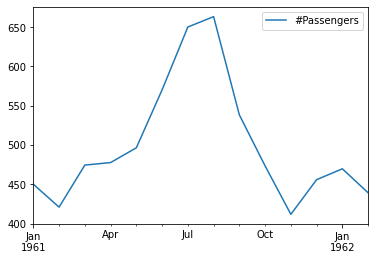

In [35]:
prediction = mod.predict()

forecast = prediction.forecast

model_results = mod.results()

validation = mod.results("validation")
forecast.plot()

In [31]:
print(forecast)

            #Passengers
1961-01-01   450.093424
1961-02-01   420.884614
1961-03-01   474.423961
1961-04-01   477.624932
1961-05-01   496.417903
1961-06-01   570.227722
1961-07-01   650.198685
1961-08-01   663.401531
1961-09-01   538.310283
1961-10-01   473.334446
1961-11-01   411.750063
1961-12-01   455.860014
1962-01-01   469.690462
1962-02-01   439.143652


In [38]:
mod.results()


,ID,Model,ModelParameters,TransformationParameters,TransformationRuntime,FitRuntime,PredictRuntime,TotalRuntime,Ensemble,Exceptions,...,mle_weighted,imle_weighted,spl_weighted,containment_weighted,contour_weighted,maxe_weighted,oda_weighted,mqae_weighted,TotalRuntimeSeconds,Score
0,6b137e857d04f132f0863f4bde46ae84,ARIMA,"{""p"": 7, ""d"": 1, ""q"": 4, ""regression_type"": null}","{""fillna"": ""rolling_mean_24"", ""transformations...",0 days 00:00:00.004058,0 days 00:00:00,0 days 00:00:01.983588,0 days 00:00:01.988608,0,NaN,...,35.644134,4.338300,0.626594,0.857143,0.857143,100.239403,0.785714,22.582182,1.9886,61.413563
1,c04ba9522e134c1ed7ca838649a643cc,ARIMA,"{""p"": 7, ""d"": 0, ""q"": 1, ""regression_type"": null}","{""fillna"": ""ffill_mean_biased"", ""transformatio...",0 days 00:00:00,0 days 00:00:00,0 days 00:00:00.259142,0 days 00:00:00.274791,0,NaN,...,31.584643,35.342340,1.082966,0.785714,0.428571,158.086395,0.714286,44.684036,0.2748,101.367900
2,b0fdd8ea69401b6884fcd9bae68818dd,ARIMA,"{""p"": 12, ""d"": 1, ""q"": 7, ""regression_type"": ""...","{""fillna"": ""mean"", ""transformations"": {""0"": ""C...",0 days 00:00:00,0 days 00:00:00.079261,0 days 00:00:02.871921,0 days 00:00:02.951182,0,NaN,...,19.119753,3.742436,0.287051,0.714286,0.857143,45.165391,0.928571,15.591458,2.9512,35.732393
3,5e75ed52611fa9266c855f5876eb8720,AverageValueNaive,"{""method"": ""Mean"", ""window"": null}","{""fillna"": ""fake_date"", ""transformations"": {""0...",0 days 00:00:00,0 days 00:00:00,0 days 00:00:00,0 days 00:00:00,0,NaN,...,40.789886,22.193230,1.620370,0.928571,0.571429,152.160699,0.714286,41.077309,0.0000,102.790066
4,3995afcc230b57c8c99f66afd5fee0fd,AverageValueNaive,"{""method"": ""Mean"", ""window"": null}","{""fillna"": ""mean"", ""transformations"": {""0"": ""C...",0 days 00:00:00.006619,0 days 00:00:00,0 days 00:00:00,0 days 00:00:00.019076,0,NaN,...,25.637624,35.455379,1.657485,0.857143,0.571429,158.381403,0.714286,34.775311,0.0191,103.110410
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1757,bcaf8e92ae2d9efe65b9bb4b4b97bd92,ConstantNaive,"{""constant"": 0}","{""fillna"": ""quadratic"", ""transformations"": {""0...",0 days 00:00:00.008062,0 days 00:00:00,0 days 00:00:00,0 days 00:00:00.018161,0,NaN,...,29.816101,12.637068,2.266996,0.000000,0.571429,94.902501,0.714286,26.102454,0.0182,98.554178
1758,ea65338c5ff4b2b928c1f5309c1796f7,ConstantNaive,"{""constant"": 0}","{""fillna"": ""linear"", ""transformations"": {""0"": ...",0 days 00:00:00.010074,0 days 00:00:00,0 days 00:00:00,0 days 00:00:00.010074,0,NaN,...,37.052307,7.995017,2.426355,0.000000,0.500000,106.570345,0.714286,26.506395,0.0101,105.543340
1759,6322c417dd071b0b6294d0f45fa18a5d,NVAR,"{""k"": 1, ""ridge_param"": 0.002, ""warmup_pts"": 1...","{""fillna"": ""fake_date"", ""transformations"": {""0...",0 days 00:00:00.002059,0 days 00:00:00,0 days 00:00:00,0 days 00:00:00.010088,0,NaN,...,55.228648,4.968329,3.291513,0.000000,0.428571,138.373499,0.285714,39.158347,0.0101,139.914441
1760,53e57e0ccbd4cdee98d8648a92624b4e,NVAR,"{""k"": 1, ""ridge_param"": 0.02, ""warmup_pts"": 50...","{""fillna"": ""fake_date"", ""transformations"": {""0...",0 days 00:00:00,0 days 00:00:00,0 days 00:00:00.010072,0 days 00:00:00.010072,0,NaN,...,63.469166,4.397307,3.752662,0.071429,0.428571,149.378742,0.285714,46.656350,0.0101,157.676568
